In [267]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [268]:
stock = pd.read_csv("C:/Users/GC/stock.csv")

In [269]:
stock

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [270]:
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low','Close']

In [271]:
stock

,Date,Code,Name,Volume,Open,High,Low,Close
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [272]:
stock['Name'].value_counts()

큐렉소       494
동원F&B     494
이원컴포텍     494
주연테크      494
EG        494
         ... 
신진에스엠     494
지놈앤컴퍼니    494
롯데쇼핑      494
인지소프트     494
시디즈       494
Name: Name, Length: 2000, dtype: int64

In [273]:
stock_AJ = stock[stock['Code']=='A060310']

In [274]:
stock_AJ = stock_AJ [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [275]:
stock_AJ

,Date,Open,High,Low,Close,Volume
0,20210601,2890,2970,2885,2920,166690
2000,20210602,2915,2975,2830,2900,134833
4000,20210603,2900,2925,2875,2900,144470
6000,20210604,2930,3120,2920,2950,934224
8000,20210607,3000,3150,2955,3150,946560
...,...,...,...,...,...,...
978000,20230523,2300,2315,2260,2285,117084
980000,20230524,2280,2300,2255,2280,67101
982000,20230525,2260,2285,2235,2245,91789
984000,20230526,2245,2915,2230,2910,13590249


In [276]:
stock_AJ['Date'].value_counts()

20220928    1
20211108    1
20220512    1
20220511    1
20220510    1
           ..
20230412    1
20230411    1
20230410    1
20230407    1
20220927    1
Name: Date, Length: 494, dtype: int64

In [277]:
# save original 'Open' prices for later
original_open = stock_AJ['Open'].values

# separate dates for future plotting
dates = pd.to_datetime(stock_AJ['Date'])

In [278]:
# variables for training
cols = list(stock_AJ)[1:6]

# new dataframe with only training data - 5 columns
stock_AJ = stock_AJ[cols].astype(float)

In [279]:
cols 

['Open', 'High', 'Low', 'Close', 'Volume']

In [305]:
from sklearn.preprocessing import StandardScaler

# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(stock_AJ)
stock_data_scaled = scaler.transform(stock_AJ)

In [306]:
TR = 9

In [307]:
# split to train data and test data
n_train = int(TR *stock_data_scaled.shape[0])
train_data_scaled = stock_data_scaled[0: n_train]
train_dates = dates[0: n_train]

test_data_scaled = stock_data_scaled[n_train:]
test_dates = dates[n_train:]

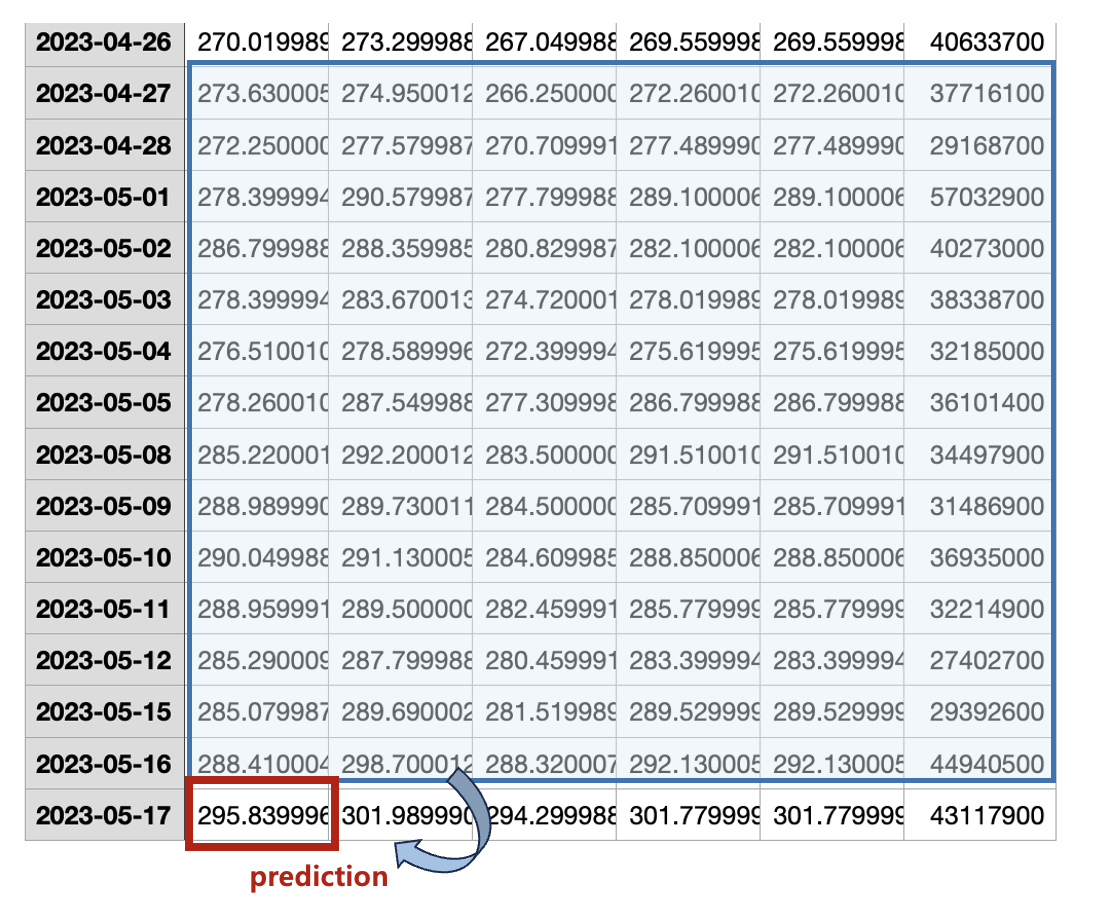

In [308]:
from IPython.display import Image

Image('stock.png')

In [309]:
# data reformatting for LSTM

pred_days = 1  # prediction period
seq_len = 14   # sequence length = past days for future prediction.
input_dim = 5  # input_dimension = ['Open', 'High', 'Low', 'Close', 'Volume']

trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, n_train-pred_days +1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

for i in range(seq_len, len(test_data_scaled)-pred_days +1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

<ipython-input-309-f590ee2fd46d>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trainX, trainY = np.array(trainX), np.array(trainY)


In [310]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils

In [311]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 10, 20)            2000      
                                                                 
 dropout_8 (Dropout)         (None, 10, 20)            0         
                                                                 
 lstm_11 (LSTM)              (None, 20)                3280      
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [312]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(trainX, trainY, epochs=70, batch_size=30)
pred_y = model.predict(testX)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [167]:
pred_y = model.predict(testX)

plt.figure()
plt.plot(testY, color='red', label='Real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.